# Final Project Submission
# REGex Software


# Project title
## Loan Status Prediction
### completed by:
### Poulami Bakshi
### Arshiya Moin

### Under Guidance of:
### Ashutosh Pandey

In [28]:
import warnings 
warnings.filterwarnings('ignore')

In [14]:
#importing the train datsets
import pandas as pd
df=pd.read_csv('C:\\Users\\nEW u\\Desktop\\DataSEts\\Loan Prediction\\train_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
#to check how many rows and columns
df.shape

(614, 13)

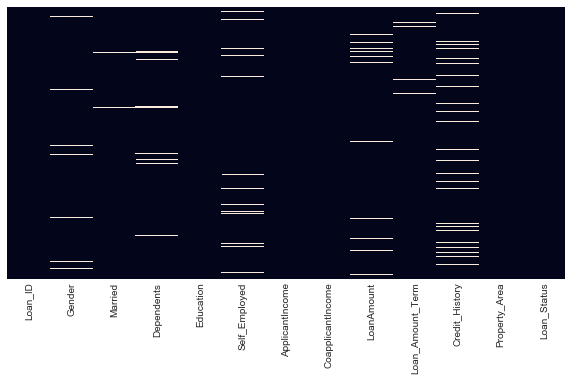

In [16]:
#importing the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#to check the null values present in which columns
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [17]:
#columns name
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Data Analysis

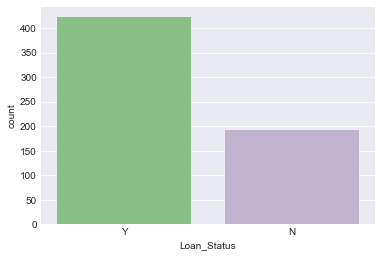

In [18]:
sns.set_style(style='darkgrid')
sns.countplot(df['Loan_Status'],palette="Accent")

#### From this above plot we can conclude that the counts of 0's is almost near about 200 and for 1's its more than 400.

In [9]:
#dropping the LoanId columns
df.drop('Loan_ID', axis='columns', inplace=True)

#extracting the categorical features
df_categorical=df.select_dtypes(include=['object']).copy()
df_categorical.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y


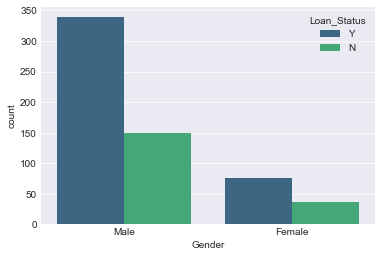

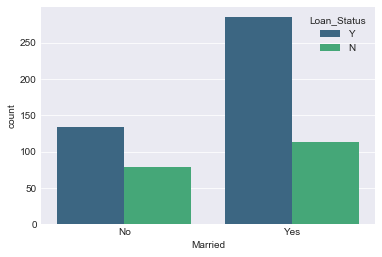

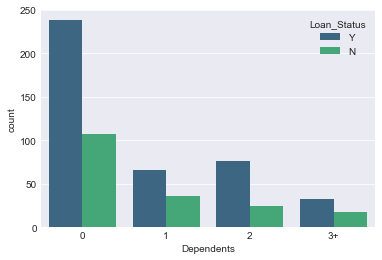

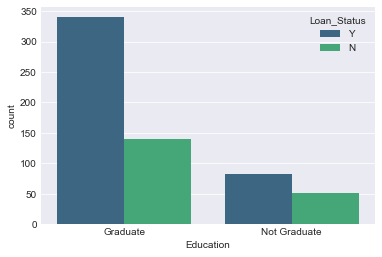

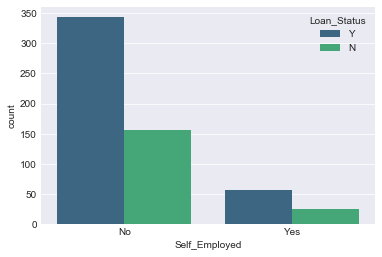

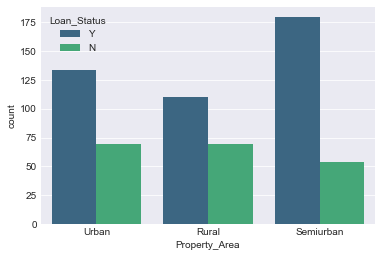

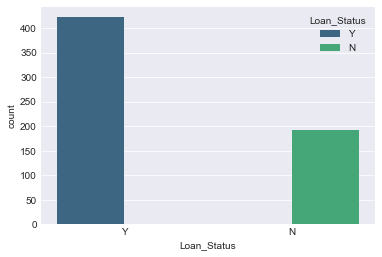

In [10]:
for i in df_categorical.columns:
    sns.countplot(df_categorical[i], hue=df_categorical['Loan_Status'],palette="viridis")
    plt.show()

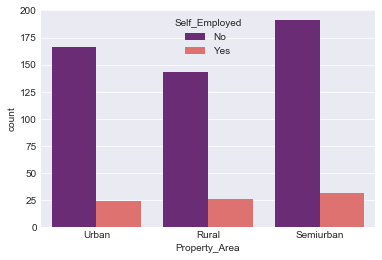

In [11]:
sns.countplot(df['Property_Area'], hue=df['Self_Employed'],palette="magma")

### Observation:
#### In Urban Rural and Semiurban the self employed member is not more than 40 and the unemployment for Urban, Rural and Semiurban is almost 200

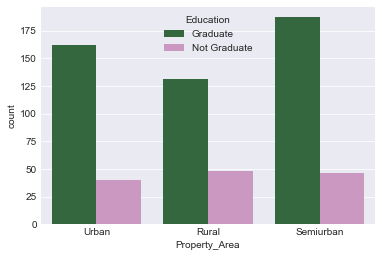

In [12]:
sns.countplot(df['Property_Area'], hue=df['Education'],palette="cubehelix")

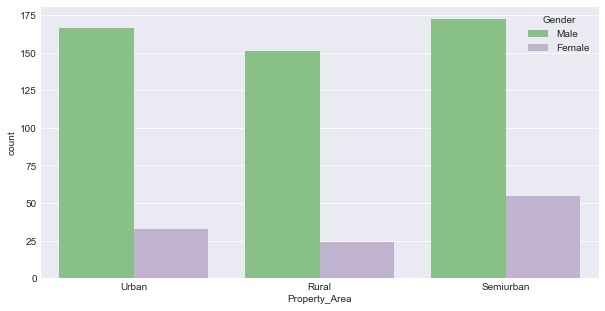

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(df['Property_Area'], hue=df['Gender'],palette="Accent")

### Observation:
#### In Urban,Rural and Semiurban the count of male members are more than 150 whereas the count of female members for Urban and Rural less than 50 but in Semiurban the female members are lessthan 50

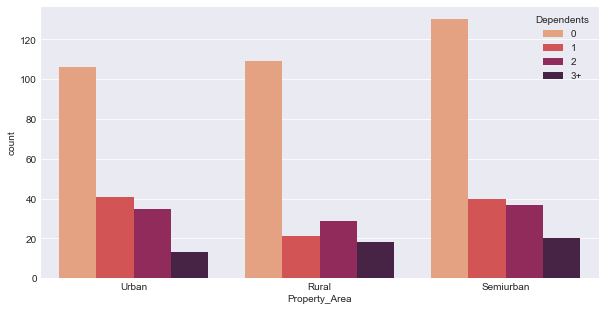

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(df['Property_Area'], hue=df['Dependents'],palette="rocket_r")

### Observation:
### Urban areas:
#### Members with 0 Dependent is more than 100, with 1 Dependent is more than 40, with 2 Dependents less than 40 and with 3+ Dependents less than 20. 

### Rural areas:
#### Members with 0 Dependent is more than 100, with 1 Dependent is almost 20, with 2 Dependents less than 40 and with 3+ Dependents less than 20. 

### Semiurban areas:
#### Members with 0 Dependent is more than 120, with 1 Dependent is almost 40, with 2 Dependents less than 40 and with 3+ Dependents is almost 20. 


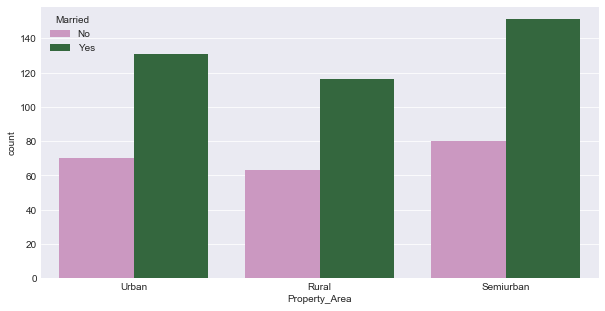

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(df['Property_Area'], hue=df['Married'],palette="cubehelix_r")

### Observation:
### Urban areas:
#### Count of Mairried Members are more than 120 and count of unmarried Members are less than 80. 

### Rural areas:
#### Count of Mairried Members are less than 120 and count of unmarried Members are more than 60. 

### Semiurban areas:
#### Count of Mairried Members are more than 140 and count of unmarried Members are almost 80. 


In [21]:
df_analysis=df.copy()

In [22]:
#replacing the 'Y' and 'N' value with 1 and 0 in Loan Status columns
df_analysis['Loan_Status']=df_analysis['Loan_Status'].replace('Y', 1)
df_analysis['Loan_Status']=df_analysis['Loan_Status'].replace('N', 0)

In [23]:
df_numeric_analysis=df_analysis.select_dtypes(exclude=['object']).copy()
df_numeric_analysis.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,NaN,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1


In [24]:
df_numeric_analysis.dropna(inplace=True)

In [25]:
df_numeric_analysis.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
dtype: int64

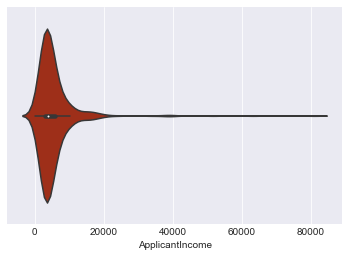

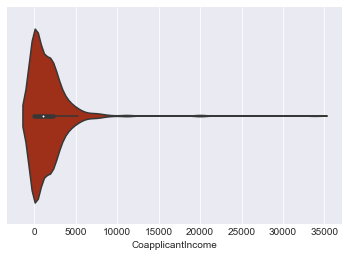

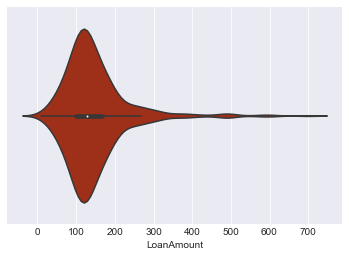

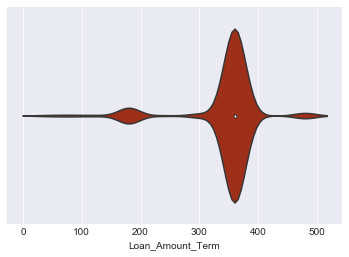

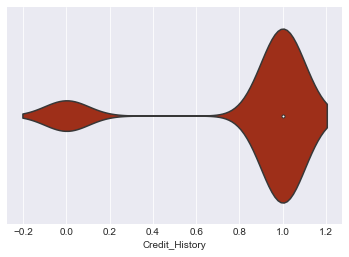

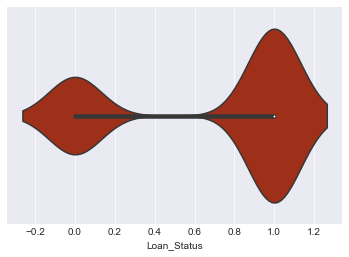

In [26]:
for i in df_numeric_analysis.columns:
    sns.violinplot(df_numeric_analysis[i], palette="gnuplot_r")
    plt.show()

#### A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

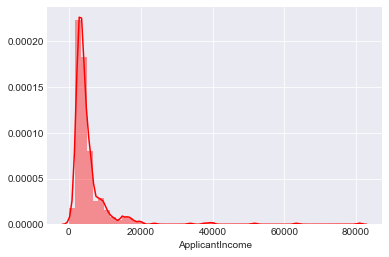

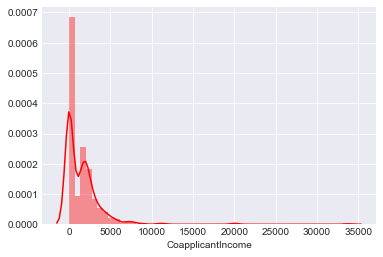

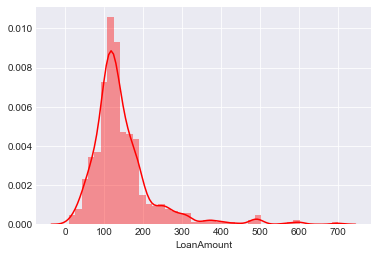

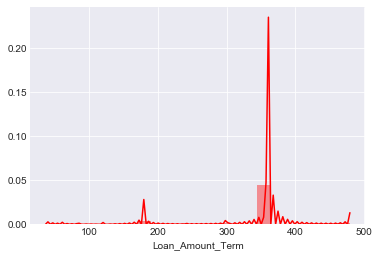

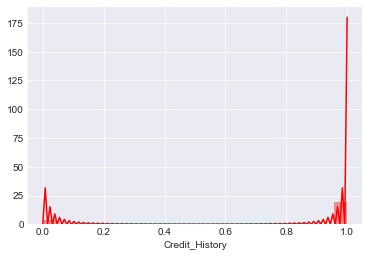

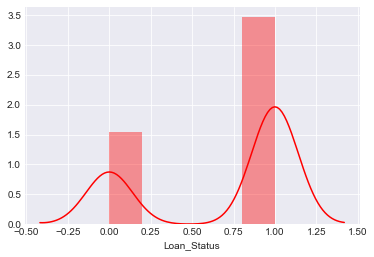

In [29]:
for i in df_numeric_analysis.columns:
    #plt.figure(figsize=(10,5))
    sns.distplot(df_numeric_analysis[i], color='r')
    plt.show()

#### distplot() function is used to plot the distplot. The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution. The seaborn. distplot() function accepts the data variable as an argument and returns the plot with the density distribution

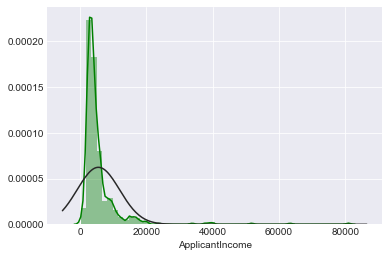

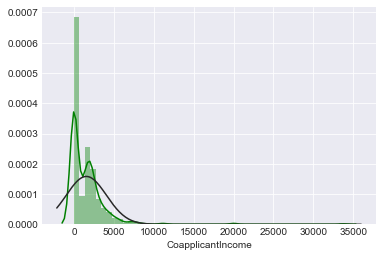

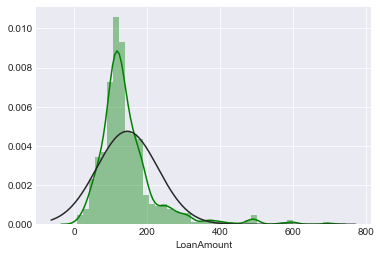

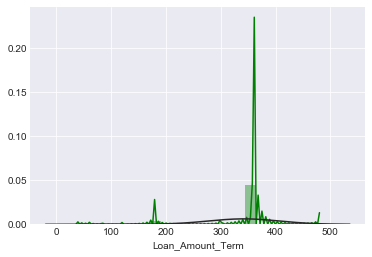

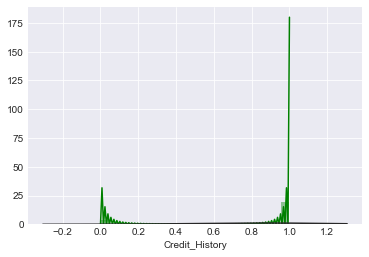

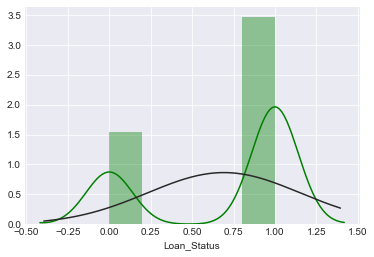

In [30]:
from scipy.stats import norm
for i in df_numeric_analysis.columns:
    #plt.figure(figsize=(10,5))
    sns.distplot(df_numeric_analysis[i], color='g',fit=norm)
    plt.show()

#### Plot the distribution with a histogram and maximum likelihood gaussian distribution fit:

Text(0,0.5,'Loan Amount')

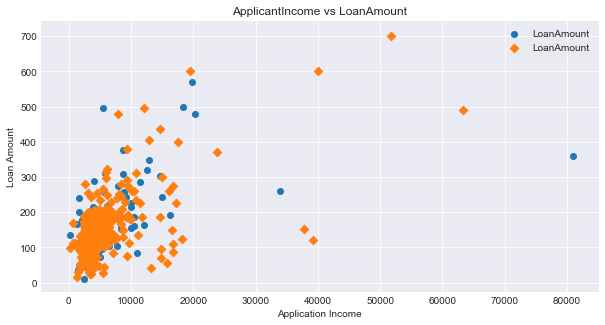

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(x='ApplicantIncome',y='LoanAmount', data=df_numeric_analysis[df_numeric_analysis['Loan_Status']==0])
plt.scatter(x='ApplicantIncome',y='LoanAmount', data=df_numeric_analysis[df_numeric_analysis['Loan_Status']==1], marker='D')
plt.title('ApplicantIncome vs LoanAmount')
plt.legend()
plt.xlabel('Application Income')
plt.ylabel('Loan Amount')


Text(0,0.5,'CoapplicantIncome')

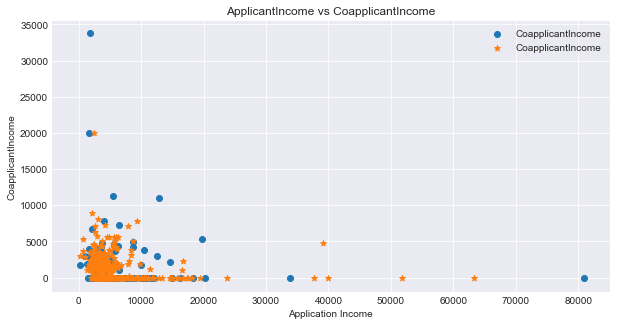

In [34]:

plt.figure(figsize=(10,5))
plt.scatter(x='ApplicantIncome',y='CoapplicantIncome', data=df_numeric_analysis[df_numeric_analysis['Loan_Status']==0])
plt.scatter(x='ApplicantIncome',y='CoapplicantIncome', data=df_numeric_analysis[df_numeric_analysis['Loan_Status']==1], marker='*')
plt.title('ApplicantIncome vs CoapplicantIncome')
plt.legend()
plt.xlabel('Application Income')
plt.ylabel('CoapplicantIncome')

## Data Cleaning

In [7]:
#printing the unique element present in Loan Status columns
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [6]:
df['Loan_Status'].nunique()

2

In [7]:
#replacing the 'Y' and 'N' value with 1 and 0 in Loan Status columns
df['Loan_Status']=df['Loan_Status'].replace('Y', 1)
df['Loan_Status']=df['Loan_Status'].replace('N', 0)

In [8]:
df['Loan_Status'].unique()

array([1, 0], dtype=int64)

In [10]:
#checking how many null values are there
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#how many numbers of uniques values are there and the count of that unique values
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [12]:
#to check the unique values
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [13]:
#filling the nan values with zero
df['Dependents']=df['Dependents'].fillna('0')

In [14]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [15]:
#uning replace() to replace the 3+ value to 3
df['Dependents']=df['Dependents'].replace('3+', 3)

In [16]:
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [18]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
df['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [20]:
df['Loan_Amount_Term'].nunique()

10

In [21]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [22]:
df['Loan_Amount_Term'].mean()

342.0

In [23]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [24]:
df['Loan_Amount_Term'].isnull().sum()

0

In [27]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [29]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [30]:
df['Credit_History']=df['Credit_History'].fillna(0.0)

In [31]:
df['Credit_History'].unique()

array([1., 0.])

In [33]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [35]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

{'whiskers': [<matplotlib.lines.Line2D at 0x1d6ad7c9400>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6ad7c9e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6ad7c9278>],
 'medians': [<matplotlib.lines.Line2D at 0x1d6ad7cf780>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6ad7cfc18>],
 'means': []}

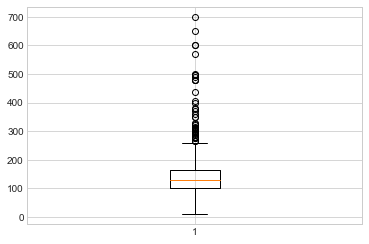

In [37]:
plt.boxplot(df['LoanAmount'])

In [38]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
df.shape

(614, 13)

In [40]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [41]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [42]:
df['Self_Employed']=df['Self_Employed'].fillna(0)
df['Self_Employed']=df['Self_Employed'].replace('Yes', 1)

In [43]:
df['Self_Employed']=df['Self_Employed'].replace('No', 0)

In [44]:
df['Self_Employed'].unique()

array([0, 1], dtype=int64)

In [46]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
df.dropna(inplace=True)

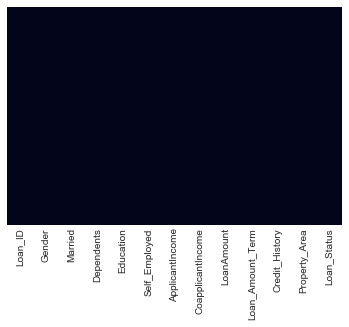

In [48]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

In [49]:
df.drop(['Loan_ID'], axis='columns', inplace=True)

In [50]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 613
Data columns (total 12 columns):
Gender               598 non-null object
Married              598 non-null object
Dependents           598 non-null object
Education            598 non-null object
Self_Employed        598 non-null int64
ApplicantIncome      598 non-null int64
CoapplicantIncome    598 non-null float64
LoanAmount           598 non-null float64
Loan_Amount_Term     598 non-null float64
Credit_History       598 non-null float64
Property_Area        598 non-null object
Loan_Status          598 non-null int64
dtypes: float64(4), int64(3), object(5)
memory usage: 60.7+ KB


In [52]:
df_categorical=df.select_dtypes(include=['object']).copy()
df_categorical.head(3)

,Gender,Married,Dependents,Education,Property_Area
0,Male,No,0,Graduate,Urban
1,Male,Yes,1,Graduate,Rural
2,Male,Yes,0,Graduate,Urban


In [53]:
for i in df_categorical.columns:
    print(f'{i} : {df_categorical[i].unique()}')

Gender : ['Male' 'Female']
Married : ['No' 'Yes']
Dependents : ['0' '1' '2' 3]
Education : ['Graduate' 'Not Graduate']
Property_Area : ['Urban' 'Rural' 'Semiurban']


In [54]:
df_categorical['Dependents']=df_categorical['Dependents'].astype('int64')

In [55]:
df_categorical['Dependents'][:5]

0    0
1    1
2    0
3    0
4    0
Name: Dependents, dtype: int64

In [56]:
df_categorical_copy=df_categorical.drop(['Dependents'], axis='columns')

In [57]:
df_categorical_copy.head()

,Gender,Married,Education,Property_Area
0,Male,No,Graduate,Urban
1,Male,Yes,Graduate,Rural
2,Male,Yes,Graduate,Urban
3,Male,Yes,Not Graduate,Urban
4,Male,No,Graduate,Urban


In [58]:
from sklearn.preprocessing import LabelEncoder
scaler_label=LabelEncoder()
df_categorical_copy=df_categorical_copy.apply(LabelEncoder().fit_transform)

df_categorical_copy.head(5)

,Gender,Married,Education,Property_Area
0,1,0,0,2
1,1,1,0,0
2,1,1,0,2
3,1,1,1,2
4,1,0,0,2


In [59]:
df_new_categorical=pd.concat([df_categorical_copy,df_categorical['Dependents']], axis=1, join='inner')

In [60]:
df_new_categorical.head()

,Gender,Married,Education,Property_Area,Dependents
0,1,0,0,2,0
1,1,1,0,0,1
2,1,1,0,2,0
3,1,1,1,2,0
4,1,0,0,2,0


In [61]:
df_new_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 613
Data columns (total 5 columns):
Gender           598 non-null int32
Married          598 non-null int32
Education        598 non-null int32
Property_Area    598 non-null int32
Dependents       598 non-null int64
dtypes: int32(4), int64(1)
memory usage: 18.7 KB


In [62]:
df_new_categorical['Dependents']=df_new_categorical['Dependents'].astype('int64')

In [63]:
df_new_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 613
Data columns (total 5 columns):
Gender           598 non-null int32
Married          598 non-null int32
Education        598 non-null int32
Property_Area    598 non-null int32
Dependents       598 non-null int64
dtypes: int32(4), int64(1)
memory usage: 18.7 KB


In [64]:
df_numeric=df.select_dtypes(exclude=['object']).copy()
df_numeric.head(3)

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,5849,0.0,146.412162,360.0,1.0,1
1,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,3000,0.0,66.000000,360.0,1.0,1


In [65]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 613
Data columns (total 7 columns):
Self_Employed        598 non-null int64
ApplicantIncome      598 non-null int64
CoapplicantIncome    598 non-null float64
LoanAmount           598 non-null float64
Loan_Amount_Term     598 non-null float64
Credit_History       598 non-null float64
Loan_Status          598 non-null int64
dtypes: float64(4), int64(3)
memory usage: 37.4 KB


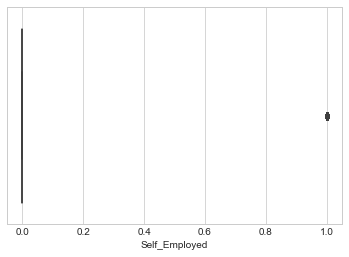

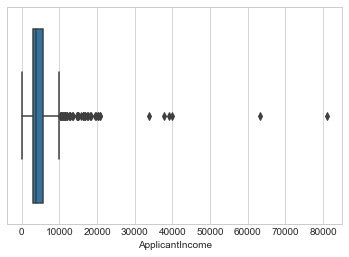

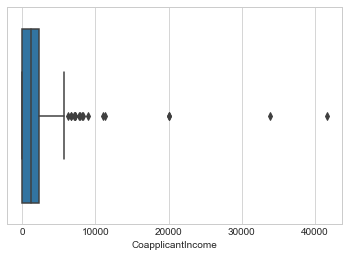

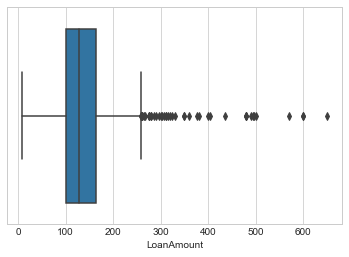

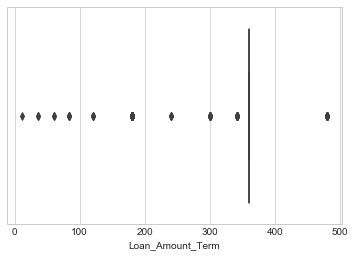

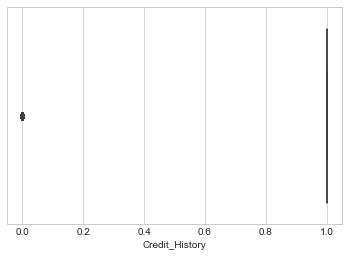

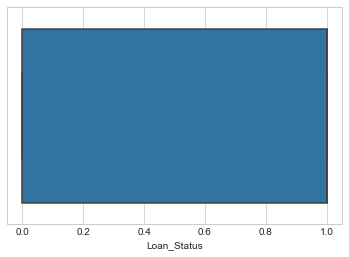

In [66]:
for i in df_numeric.columns:
    sns.boxplot(df_numeric[i])
    plt.show()

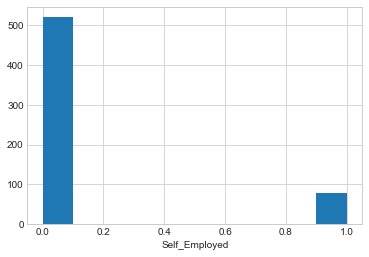

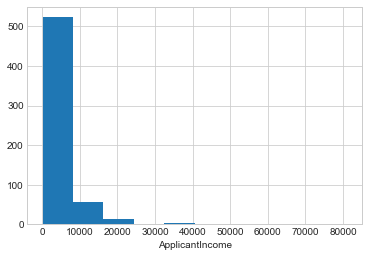

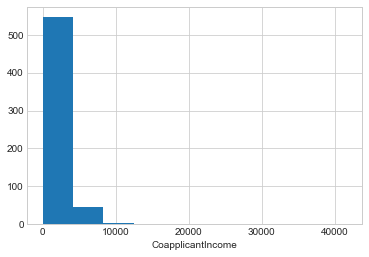

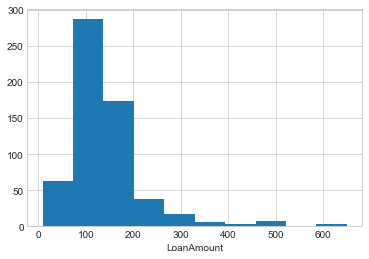

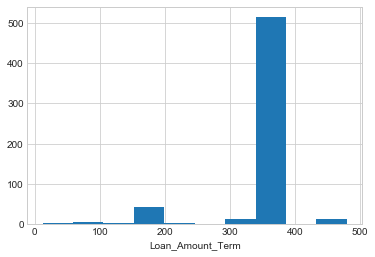

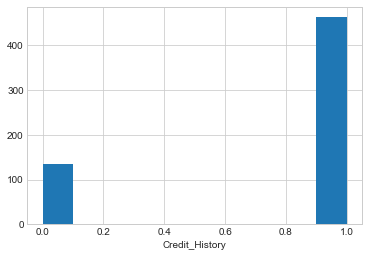

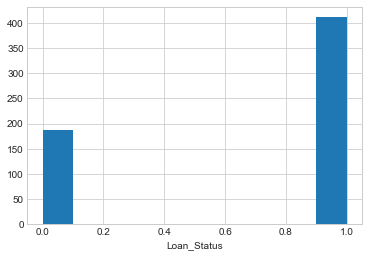

In [67]:
for i in df_numeric.columns:
    plt.hist(df_numeric[i])
    plt.xlabel(i)
    plt.show()

In [68]:
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Self_Employed           0.0
ApplicantIncome      2868.5
CoapplicantIncome    2324.0
LoanAmount             63.5
Loan_Amount_Term        0.0
Credit_History          0.0
Loan_Status             1.0
dtype: float64


In [69]:
df_numeric.shape

(598, 7)

In [70]:
print((df_numeric < (Q1 - 1.5 * IQR)) |(df_numeric > (Q3 + 1.5 * IQR)))

     Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0            False            False              False       False   
1            False            False              False       False   
2             True            False              False       False   
3            False            False              False       False   
4            False            False              False       False   
5             True            False              False        True   
6            False            False              False       False   
7            False            False              False       False   
8            False            False              False       False   
9            False             True               True        True   
10           False            False              False       False   
11           False            False              False       False   
12           False            False               True       False   
13           False  

In [71]:
df_numeric_remove_outlier = df_numeric[~((df_numeric < (Q1 - 1.5 * IQR)) |(df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]
df_numeric_remove_outlier.shape

(307, 7)

In [72]:
df_train=pd.concat([df_new_categorical, df_numeric_remove_outlier], axis=1, join='inner')

In [73]:
df_train.head(5)

,Gender,Married,Education,Property_Area,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,2,0,0,5849,0.0,146.412162,360.0,1.0,1
1,1,1,0,0,1,0,4583,1508.0,128.000000,360.0,1.0,0
3,1,1,1,2,0,0,2583,2358.0,120.000000,360.0,1.0,1
4,1,0,0,2,0,0,6000,0.0,141.000000,360.0,1.0,1
6,1,1,1,2,0,0,2333,1516.0,95.000000,360.0,1.0,1


In [74]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 612
Data columns (total 12 columns):
Gender               307 non-null int32
Married              307 non-null int32
Education            307 non-null int32
Property_Area        307 non-null int32
Dependents           307 non-null int64
Self_Employed        307 non-null int64
ApplicantIncome      307 non-null int64
CoapplicantIncome    307 non-null float64
LoanAmount           307 non-null float64
Loan_Amount_Term     307 non-null float64
Credit_History       307 non-null float64
Loan_Status          307 non-null int64
dtypes: float64(4), int32(4), int64(4)
memory usage: 26.4 KB


In [75]:
x_data_train=df_train.drop(['Loan_Status'], axis='columns')
y_data_train=df_train.Loan_Status

In [76]:
x_data_train.head(5)

,Gender,Married,Education,Property_Area,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,2,0,0,5849,0.0,146.412162,360.0,1.0
1,1,1,0,0,1,0,4583,1508.0,128.000000,360.0,1.0
3,1,1,1,2,0,0,2583,2358.0,120.000000,360.0,1.0
4,1,0,0,2,0,0,6000,0.0,141.000000,360.0,1.0
6,1,1,1,2,0,0,2333,1516.0,95.000000,360.0,1.0


In [77]:
y_data_train[:5]

0    1
1    0
3    1
4    1
6    1
Name: Loan_Status, dtype: int64

In [78]:
x_data_train.describe()

,Gender,Married,Education,Property_Area,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.0,307.000000,307.000000,307.000000,307.0,307.0
mean,0.807818,0.628664,0.205212,1.003257,0.674267,0.0,3943.257329,1345.892899,126.899419,360.0,1.0
std,0.394659,0.483951,0.404516,0.777537,0.972543,0.0,1760.322312,1365.784845,44.741970,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,150.000000,0.000000,9.000000,360.0,1.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,2734.000000,0.000000,100.000000,360.0,1.0
50%,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,3600.000000,1425.000000,125.000000,360.0,1.0
75%,1.000000,1.000000,0.000000,2.000000,1.000000,0.0,4681.500000,2216.000000,150.000000,360.0,1.0
max,1.000000,1.000000,1.000000,2.000000,3.000000,0.0,10000.000000,5625.000000,258.000000,360.0,1.0


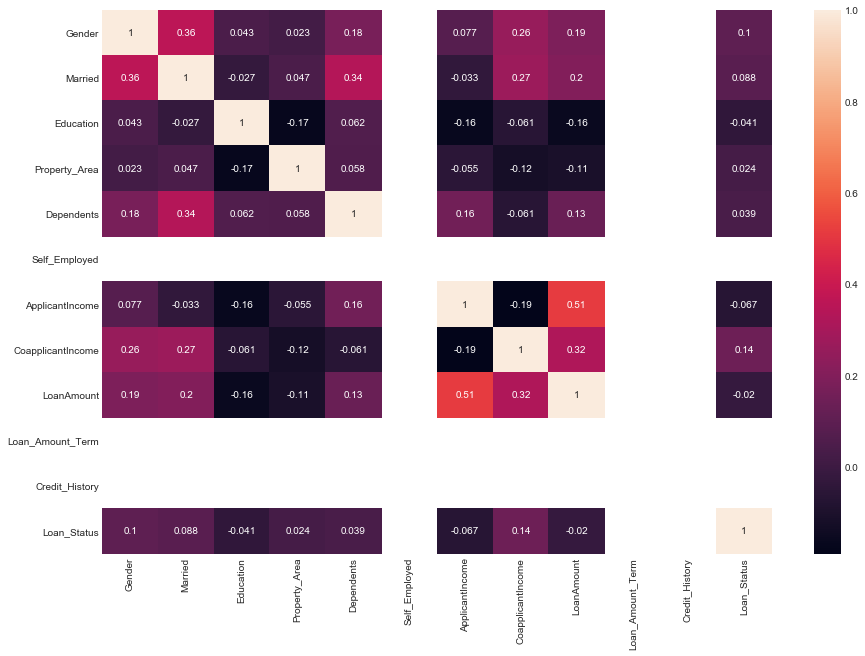

In [79]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(), annot=True)

In [80]:
from sklearn.preprocessing import StandardScaler
scaler_train=StandardScaler()
scaler_train_data=scaler_train.fit_transform(x_data_train)

C:\Users\Public\anacondainstallation\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Public\anacondainstallation\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [81]:
scaler_train_data[:5]

array([[ 0.48775324, -1.30114659, -0.50813061,  1.2840153 , -0.6944354 ,
         0.        ,  1.0843776 , -0.9870444 ,  0.43682924,  0.        ,
         0.        ],
       [ 0.48775324,  0.76855291, -0.50813061, -1.29240755,  0.33547604,
         0.        ,  0.36401694,  0.11888532,  0.02463856,  0.        ,
         0.        ],
       [ 0.48775324,  0.76855291,  1.96799794,  1.2840153 , -0.6944354 ,
         0.        , -0.77399357,  0.74225419, -0.1544564 ,  0.        ,
         0.        ],
       [ 0.48775324, -1.30114659, -0.50813061,  1.2840153 , -0.6944354 ,
         0.        ,  1.1702974 , -0.9870444 ,  0.31566787,  0.        ,
         0.        ],
       [ 0.48775324,  0.76855291,  1.96799794,  1.2840153 , -0.6944354 ,
         0.        , -0.91624489,  0.12475232, -0.71412814,  0.        ,
         0.        ]])

In [82]:
df_train_scaled=pd.DataFrame(data=scaler_train_data , columns=x_data_train.columns)

In [83]:
df_train_scaled.head(5)

,Gender,Married,Education,Property_Area,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.487753,-1.301147,-0.508131,1.284015,-0.694435,0.0,1.084378,-0.987044,0.436829,0.0,0.0
1,0.487753,0.768553,-0.508131,-1.292408,0.335476,0.0,0.364017,0.118885,0.024639,0.0,0.0
2,0.487753,0.768553,1.967998,1.284015,-0.694435,0.0,-0.773994,0.742254,-0.154456,0.0,0.0
3,0.487753,-1.301147,-0.508131,1.284015,-0.694435,0.0,1.170297,-0.987044,0.315668,0.0,0.0
4,0.487753,0.768553,1.967998,1.284015,-0.694435,0.0,-0.916245,0.124752,-0.714128,0.0,0.0


In [84]:
y_data_train[:5]

0    1
1    0
3    1
4    1
6    1
Name: Loan_Status, dtype: int64

# EDA for test data

In [85]:
df_test=pd.read_csv('C:\\Users\\nEW u\\Desktop\\DataSEts\\Loan Prediction\\test_data.csv')
df_test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [86]:
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [87]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [88]:
df_test.shape

(367, 12)

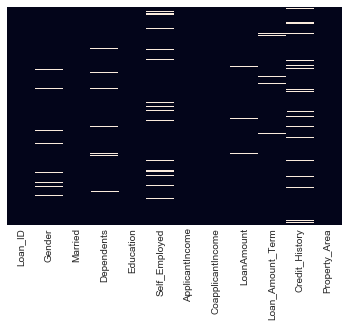

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False)

In [90]:
df_test['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [91]:
df_test['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [92]:
df_test['Dependents']=df_test['Dependents'].replace('3+', '3')
df_test['Dependents']=df_test['Dependents'].fillna('0')

In [93]:
df_test['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [94]:
df_test['Dependents'].value_counts()

0    210
2     59
1     58
3     40
Name: Dependents, dtype: int64

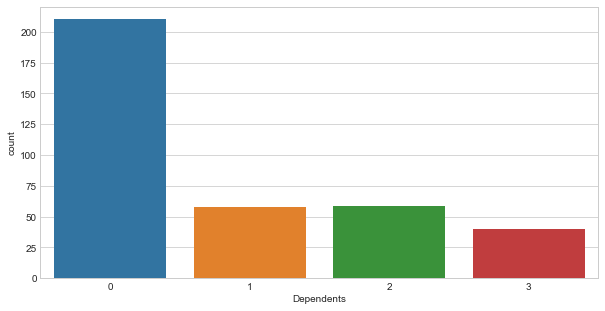

In [95]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.countplot(df_test['Dependents'])

In [96]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [97]:
df_test['Loan_Amount_Term'].describe()

count    361.000000
mean     342.537396
std       65.156643
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [98]:
df_test['Loan_Amount_Term'].nunique()

12

In [99]:
df_test['Loan_Amount_Term'].nunique()

12

In [100]:
df_test['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [101]:
df_test['Loan_Amount_Term'].mean()

342.53739612188366

In [102]:
df_test['Loan_Amount_Term']=df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mean())

In [103]:
df_test['Loan_Amount_Term'].isnull().sum()

0

(array([  3.,   4.,   1.,  22.,   4.,   0.,   7., 318.,   0.,   8.]),
 array([  6. ,  53.4, 100.8, 148.2, 195.6, 243. , 290.4, 337.8, 385.2,
        432.6, 480. ]),
 <a list of 10 Patch objects>)

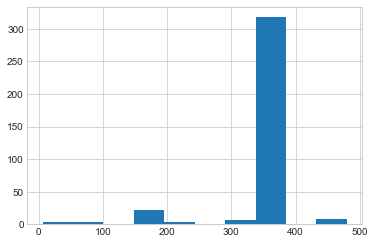

In [104]:
plt.hist(df_test['Loan_Amount_Term'])

In [105]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

In [106]:
df_test['Credit_History'].unique()

array([ 1., nan,  0.])

In [107]:
df_test['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [108]:
df_test['Credit_History']=df_test['Credit_History'].fillna(0.0)

In [109]:
df_test['Credit_History'].unique()

array([1., 0.])

In [110]:
df_test['Credit_History'].isnull().sum()

0

In [111]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [112]:
df_test['LoanAmount'].describe()

count    362.000000
mean     136.132597
std       61.366652
min       28.000000
25%      100.250000
50%      125.000000
75%      158.000000
max      550.000000
Name: LoanAmount, dtype: float64

In [113]:
df_test['LoanAmount']=df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean())

In [114]:
df_test['LoanAmount'].isnull().sum()

0

(array([ 46., 160., 105.,  37.,   8.,   6.,   2.,   1.,   1.,   1.]),
 array([ 28. ,  80.2, 132.4, 184.6, 236.8, 289. , 341.2, 393.4, 445.6,
        497.8, 550. ]),
 <a list of 10 Patch objects>)

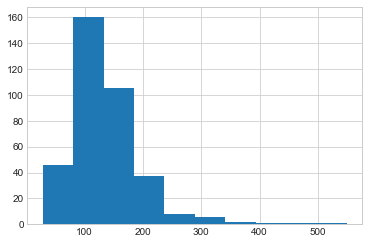

In [115]:
plt.hist(df_test['LoanAmount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d6af5770f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6af59d978>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6af591eb8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d6af5a4278>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6af5a46d8>],
 'means': []}

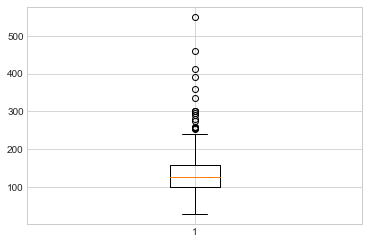

In [116]:
plt.boxplot(df_test['LoanAmount'])

In [117]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [118]:
df_test['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [119]:
df_test['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [120]:
df_test['Self_Employed']=df_test['Self_Employed'].fillna(0)
df_test['Self_Employed']=df_test['Self_Employed'].replace('Yes', 1)
df_test['Self_Employed']=df_test['Self_Employed'].replace('No', 0)

In [121]:
df_test['Self_Employed'].unique()

array([0, 1], dtype=int64)

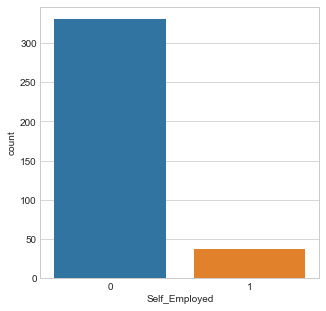

In [122]:
sns.set_style('whitegrid')
plt.figure(figsize=(5,5))
sns.countplot(df_test['Self_Employed'])

In [123]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [124]:
df_test.dropna(inplace=True)

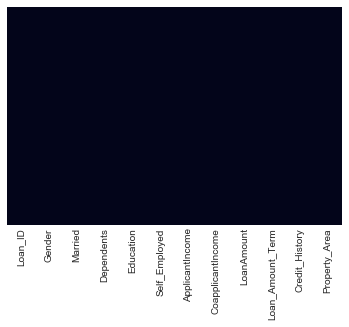

In [125]:
sns.heatmap(df_test.isnull(),yticklabels=False, cbar=False)

In [126]:
df_test.drop(['Loan_ID'], axis='columns', inplace=True)

In [127]:
df_test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [128]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 0 to 366
Data columns (total 11 columns):
Gender               356 non-null object
Married              356 non-null object
Dependents           356 non-null object
Education            356 non-null object
Self_Employed        356 non-null int64
ApplicantIncome      356 non-null int64
CoapplicantIncome    356 non-null int64
LoanAmount           356 non-null float64
Loan_Amount_Term     356 non-null float64
Credit_History       356 non-null float64
Property_Area        356 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 33.4+ KB


In [129]:
df_categorical_test=df_test.select_dtypes(include=['object']).copy()
df_categorical_test.head(3)

,Gender,Married,Dependents,Education,Property_Area
0,Male,Yes,0,Graduate,Urban
1,Male,Yes,1,Graduate,Urban
2,Male,Yes,2,Graduate,Urban


In [130]:
for i in df_categorical_test.columns:
    print(f'{i} : {df_categorical_test[i].unique()}')

Gender : ['Male' 'Female']
Married : ['Yes' 'No']
Dependents : ['0' '1' '2' '3']
Education : ['Graduate' 'Not Graduate']
Property_Area : ['Urban' 'Semiurban' 'Rural']


In [131]:
from sklearn.preprocessing import LabelEncoder
scaler_label=LabelEncoder()
df_categorical_test=df_categorical_test.apply(LabelEncoder().fit_transform)

df_categorical_test.head(5)

,Gender,Married,Dependents,Education,Property_Area
0,1,1,0,0,2
1,1,1,1,0,2
2,1,1,2,0,2
3,1,1,2,0,2
4,1,0,0,1,2


In [132]:
df_categorical_test['Dependents'].unique()

array([0, 1, 2, 3], dtype=int64)

In [133]:
df_categorical_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 0 to 366
Data columns (total 5 columns):
Gender           356 non-null int32
Married          356 non-null int32
Dependents       356 non-null int32
Education        356 non-null int32
Property_Area    356 non-null int32
dtypes: int32(5)
memory usage: 9.7 KB


In [134]:
df_numeric_test=df_test.select_dtypes(exclude=['object']).copy()
df_numeric_test.head(3)

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,5720,0,110.0,360.0,1.0
1,0,3076,1500,126.0,360.0,1.0
2,0,5000,1800,208.0,360.0,1.0


In [135]:
df_final_test=pd.concat([df_categorical_test, df_numeric_test], axis=1, join='inner')

In [136]:
df_final_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 0 to 366
Data columns (total 11 columns):
Gender               356 non-null int32
Married              356 non-null int32
Dependents           356 non-null int32
Education            356 non-null int32
Property_Area        356 non-null int32
Self_Employed        356 non-null int64
ApplicantIncome      356 non-null int64
CoapplicantIncome    356 non-null int64
LoanAmount           356 non-null float64
Loan_Amount_Term     356 non-null float64
Credit_History       356 non-null float64
dtypes: float64(3), int32(5), int64(3)
memory usage: 26.4 KB


In [137]:
df_final_test.shape

(356, 11)

In [138]:
from sklearn.preprocessing import StandardScaler
scaler_test=StandardScaler()
scaler_test_data=scaler_test.fit_transform(df_final_test)

C:\Users\Public\anacondainstallation\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Public\anacondainstallation\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [139]:
scaler_test_data[:5]

array([[ 0.49472744,  0.74015275, -0.76624862, -0.5383819 ,  1.11261181,
        -0.33020337,  0.19573472, -0.66810844, -0.4326832 ,  0.26964693,
         0.56437445],
       [ 0.49472744,  0.74015275,  0.17115519, -0.5383819 ,  1.11261181,
        -0.33020337, -0.35576062, -0.0309135 , -0.1726166 ,  0.26964693,
         0.56437445],
       [ 0.49472744,  0.74015275,  1.108559  , -0.5383819 ,  1.11261181,
        -0.33020337,  0.04555445,  0.09652549,  1.1602247 ,  0.26964693,
         0.56437445],
       [ 0.49472744,  0.74015275,  1.108559  , -0.5383819 ,  1.11261181,
        -0.33020337, -0.50927823,  0.41342377, -0.59522482,  0.26964693,
        -1.77187327],
       [ 0.49472744, -1.35107247, -0.76624862,  1.85741756,  1.11261181,
        -0.33020337, -0.31404388, -0.66810844, -0.95281639,  0.26964693,
         0.56437445]])

In [140]:
df_test_scaled=pd.DataFrame(data=scaler_test_data , columns=df_final_test.columns)

In [141]:
df_test_scaled.head(5)

,Gender,Married,Dependents,Education,Property_Area,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.494727,0.740153,-0.766249,-0.538382,1.112612,-0.330203,0.195735,-0.668108,-0.432683,0.269647,0.564374
1,0.494727,0.740153,0.171155,-0.538382,1.112612,-0.330203,-0.355761,-0.030914,-0.172617,0.269647,0.564374
2,0.494727,0.740153,1.108559,-0.538382,1.112612,-0.330203,0.045554,0.096525,1.160225,0.269647,0.564374
3,0.494727,0.740153,1.108559,-0.538382,1.112612,-0.330203,-0.509278,0.413424,-0.595225,0.269647,-1.771873
4,0.494727,-1.351072,-0.766249,1.857418,1.112612,-0.330203,-0.314044,-0.668108,-0.952816,0.269647,0.564374


for trainning the data:-
    df_train_scaled,
    y_data_train

    
for testing the data:-df_test_scaled

In [142]:
df_train_scaled.dtypes

Gender               float64
Married              float64
Education            float64
Property_Area        float64
Dependents           float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

In [143]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test= train_test_split(df_train_scaled,y_data_train, test_size=0.2)

In [144]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape


((245, 11), (62, 11), (245,), (62,))

In [145]:
from sklearn.tree import DecisionTreeClassifier
model_DT=DecisionTreeClassifier(criterion='entropy')
model_DT.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [146]:
y_pred_DT=model_DT.predict(X_test)

In [147]:
y_pred_DT[:5]

array([1, 1, 0, 0, 1], dtype=int64)

In [148]:
y_test[:5]

586    1
465    1
209    0
134    1
551    1
Name: Loan_Status, dtype: int64

In [149]:
model_DT.score(X_test,y_test)

0.7096774193548387

### using gridsearchcv and crossvalidation

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix






In [151]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20,25,30,40],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,15,20,25,30]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'C': [1,5,10,15,20,25]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy']
        }
    }
}

In [152]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score

C:\Users\Public\anacondainstallation\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Public\anacondainstallation\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Public\anacondainstallation\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,model,best_score,best_params
0,svm,0.832653,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.824490,{'n_estimators': 25}
2,logistic_regression,0.824490,{'C': 1}
3,decision_tree,0.742857,{'criterion': 'gini'}


In [154]:
model=SVC(kernel='rbf')
model.fit(X_train,y_train)

C:\Users\Public\anacondainstallation\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [155]:
model.score(X_test,y_test)

0.7903225806451613

In [156]:
y_pred=model.predict(X_test)

In [157]:
y_pred[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [158]:
y_train[:5]

463    1
158    1
574    0
612    1
295    1
Name: Loan_Status, dtype: int64

In [159]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 0, 13],
       [ 0, 49]], dtype=int64)

In [160]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.79      1.00      0.88        49

   micro avg       0.79      0.79      0.79        62
   macro avg       0.40      0.50      0.44        62
weighted avg       0.62      0.79      0.70        62



C:\Users\Public\anacondainstallation\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Public\anacondainstallation\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Public\anacondainstallation\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [161]:
y_pred_test_data=model.predict(df_test_scaled)

In [162]:
y_pred_test_data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,